**Step 0: Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout


**Step 1: Load dataset**

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Step 2: Explore Data Analys**

In [ ]:
df.shape # show shape of dataset

(303, 14)

In [ ]:
df.info() # show data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()
# return data in term of statistic

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()
# show number of null value, if all features are 0 null value, it is ready to analyze

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Train / Val split**

In [ ]:
TARGET_COL = 'output'


X = df[df.columns.drop(TARGET_COL)].values
y = df[[TARGET_COL]].values


VAL_RATIO = 0.2
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = VAL_RATIO, random_state = SEED)

In [ ]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]

print(f"num_train = {num_train}")
print(f"num_val = {num_test}")

num_train = 242
num_val = 61


**Data Visulalization**

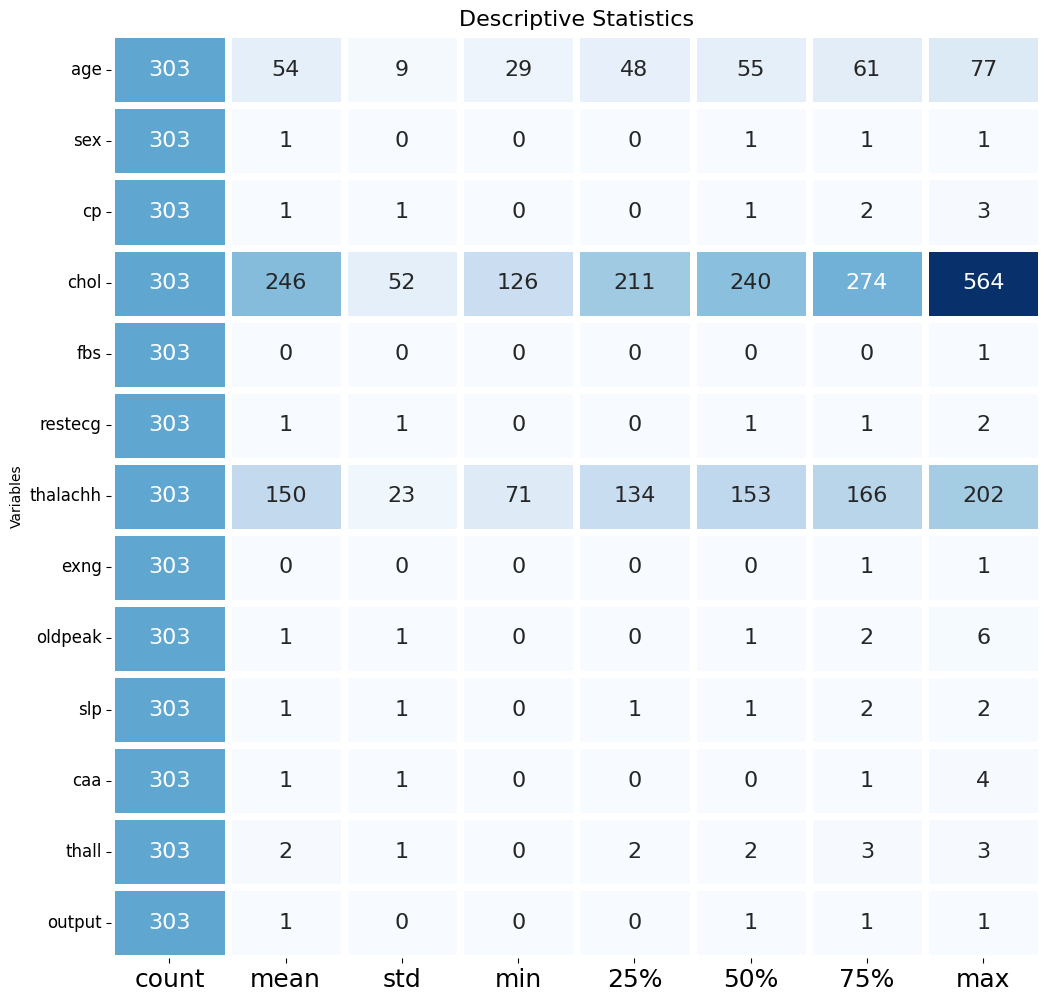

In [ ]:
desc = df.describe().T
df_2 = pd.DataFrame(index = ['age','sex','cp', 'chol', 'fbs', "restecg", "thalachh",
'exng', 'oldpeak','slp','caa','thall','output'],
                      columns =['count','mean','std','min', '25%','50%','75%','max'], data = desc)
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(df_2, annot = True, cmap = "Blues", fmt = '.0f',ax =ax, linewidths =5, cbar = False, annot_kws ={"size":16})
plt.xticks(size=18)
plt.yticks(size=12, rotation=0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size=16)
plt.show()

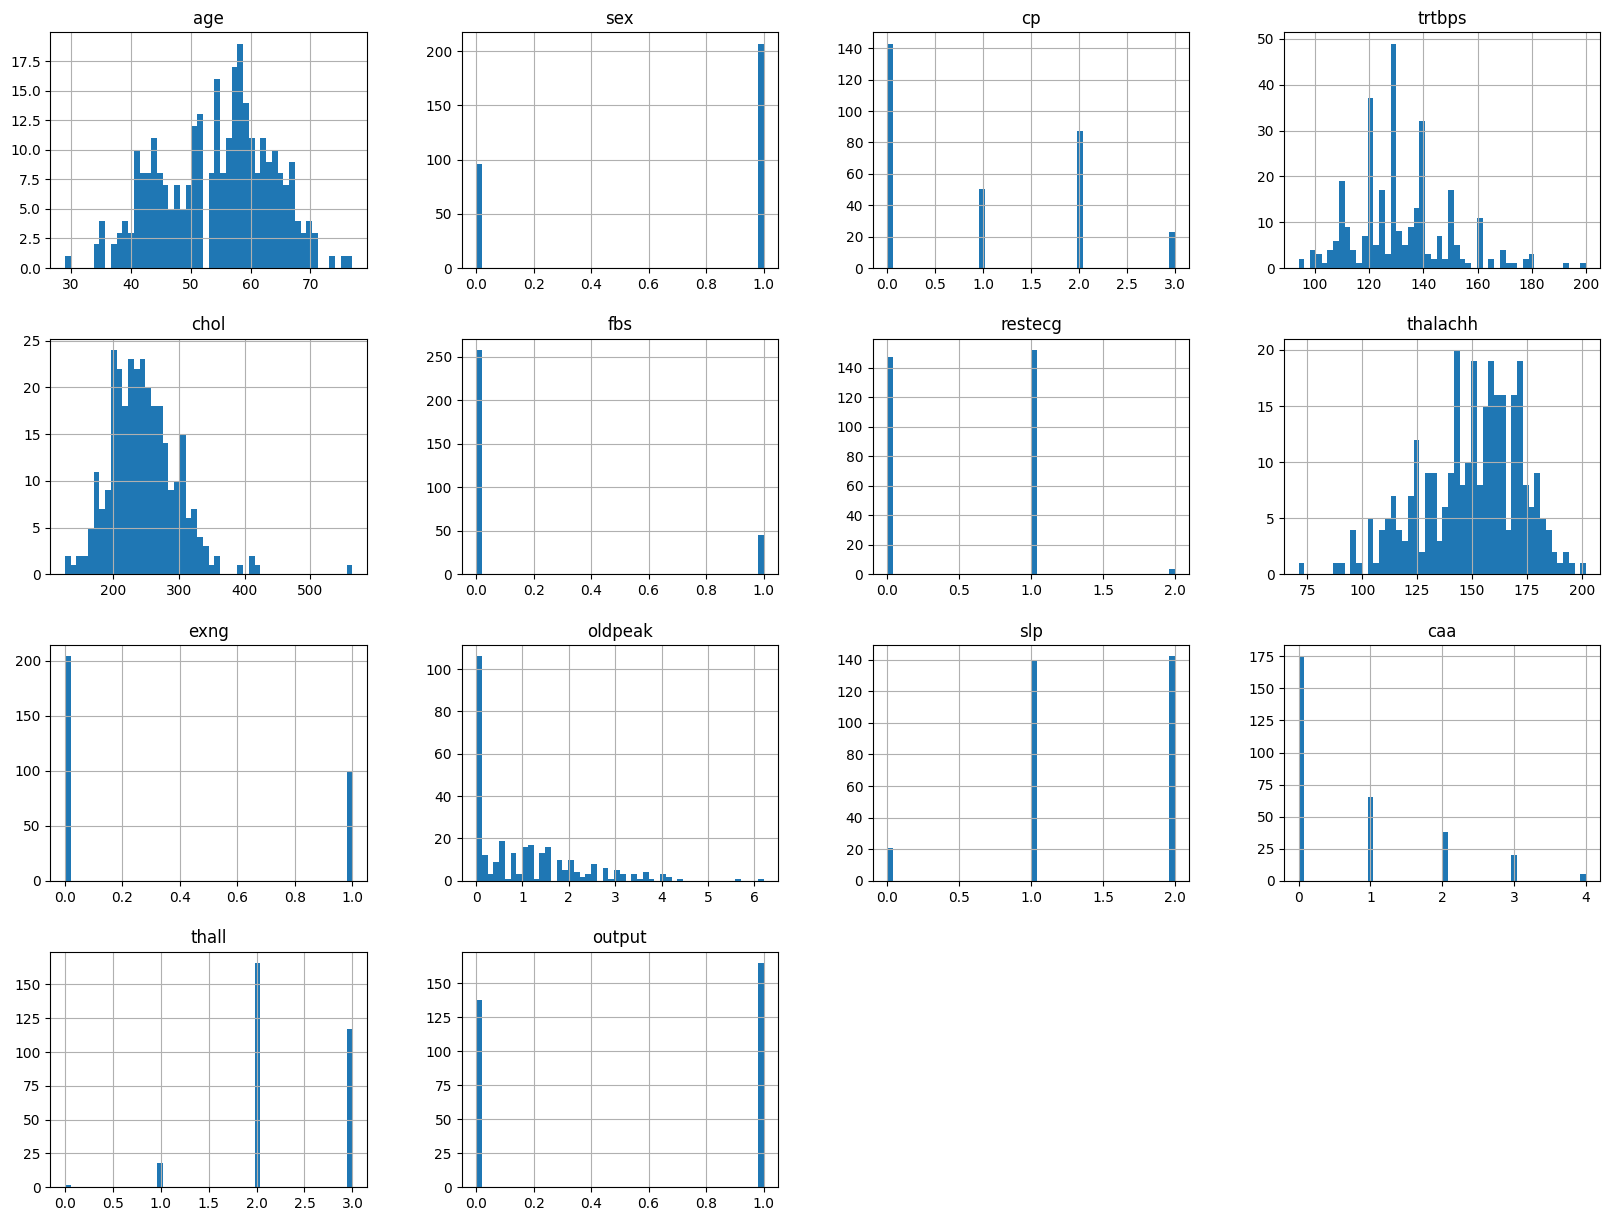

In [ ]:
df.hist(bins = 50, figsize = (20,15))
plt.show()
# show distribution of data, how many values fall into each interval or bin

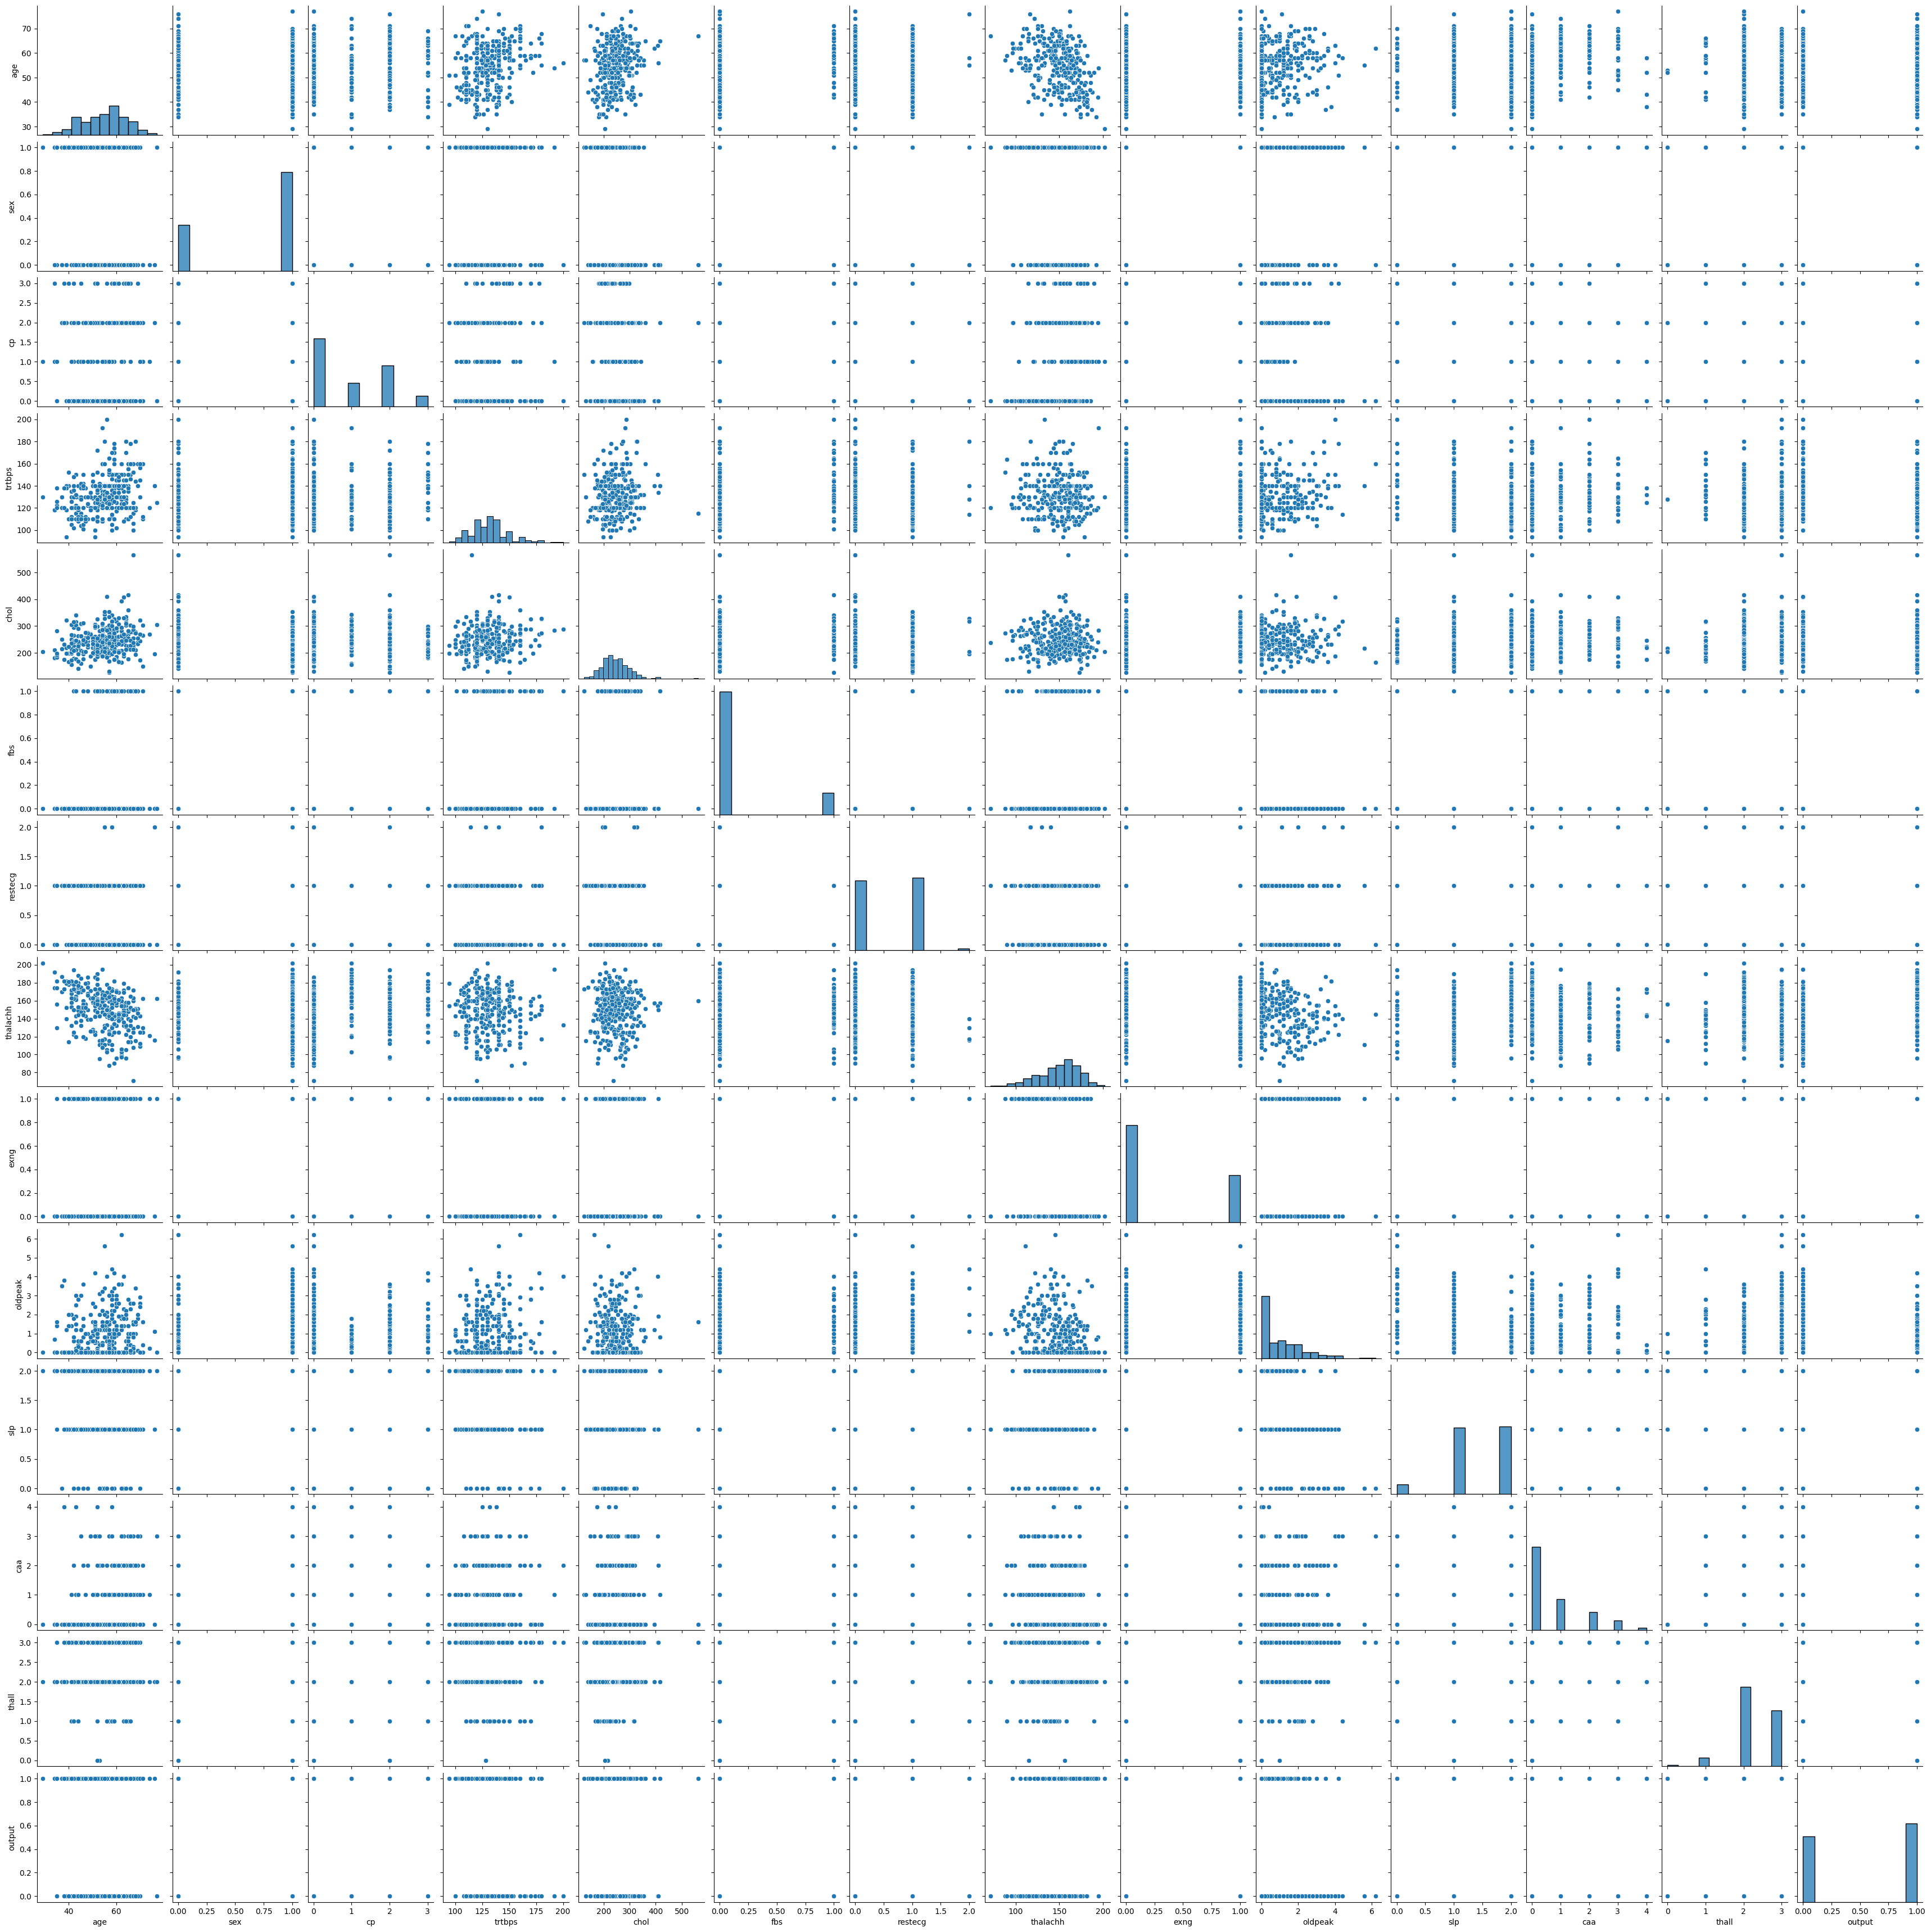

In [ ]:
# Pairplot of dataset
# hows the pairwise relationships between the variables
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

**Correlation**

In [ ]:
df_3 = df.copy()

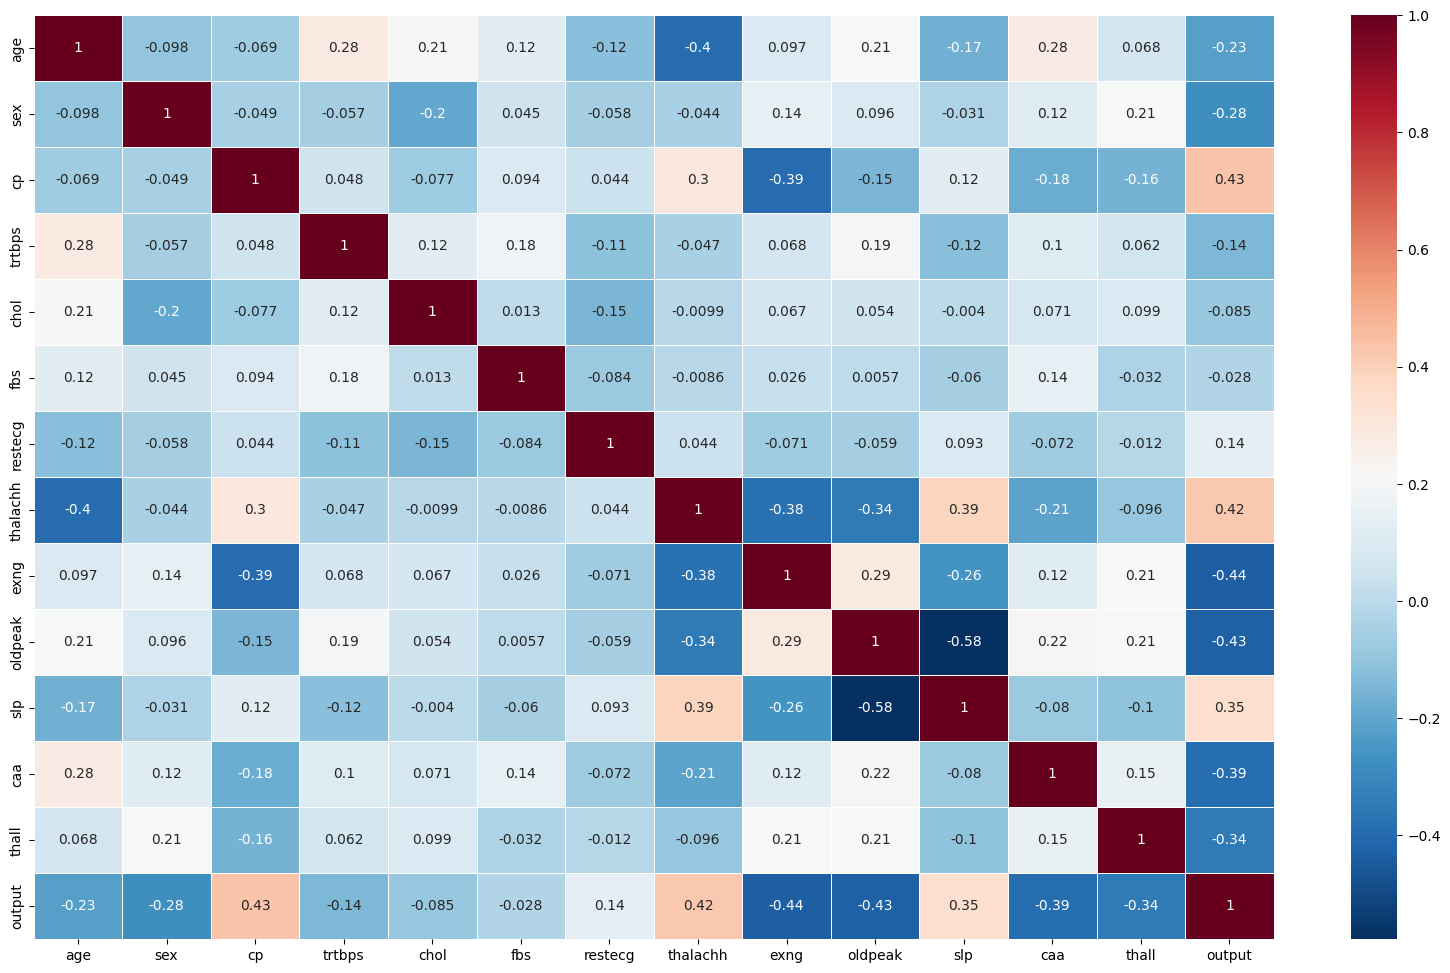

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
ax = sns.heatmap(df_3.corr(), cmap = 'RdBu_r', cbar = True, annot = True, linewidths = 0.5, ax = ax)
plt.show()
# show relationship between iables

**Build DL**

In [ ]:
def create_model(input_shape: tuple, output_shape: tuple) -> Model:
  input = Input(shape = input_shape)
  x = Dense(units = 64, activation = "relu")(input)
  x = Dense(units = 128, activation = "relu")(x)
  x = Dense(units = 64, activation = "relu")(x)
  output = Dense(units = output_shape, activation = "sigmoid")(x)
  return Model(input, output)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
input_shape = (13, )

In [ ]:
output_shape = 1

In [ ]:
model = create_model(input_shape, output_shape)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_32 (Dense)            (None, 64)                896       
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17537 (68.50 KB)
Trainable params: 17537 (68.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 10,
                    validation_data = (X_test, y_test)
)

Epoch 1/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4080 - accuracy: 0.8058 - val_loss: 0.4268 - val_accuracy: 0.8197
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4129 - accuracy: 0.8058 - val_loss: 0.3634 - val_accuracy: 0.8852
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8430 - val_loss: 0.4955 - val_accuracy: 0.8033
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8140 - val_loss: 0.4948 - val_accuracy: 0.7541
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.8306 - val_loss: 0.4281 - val_accuracy: 0.8361
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3529 - accuracy: 0.8471 - val_loss: 0.3835 - val_accuracy: 0.8689
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 0.8223 - val_loss: 0.5474 - val_accuracy: 0.7541
Epoch 8/20
25/25 [==

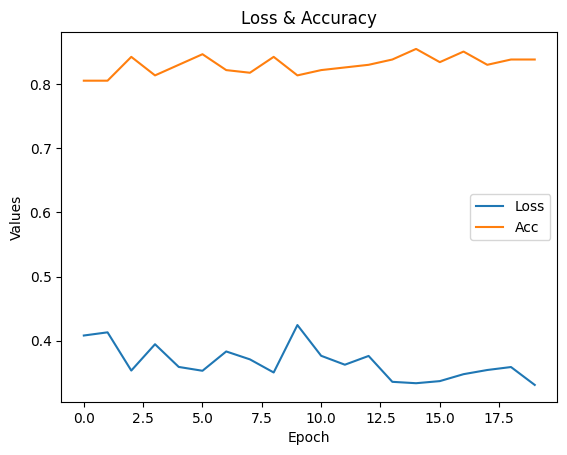

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

=> Discussion: the graph show loss function and accuracy which is fine. Because the loss function decreased (reducing error after training), the accuracy is more increasingly during training (classify more accurate). The gap between 2 lines is stable.

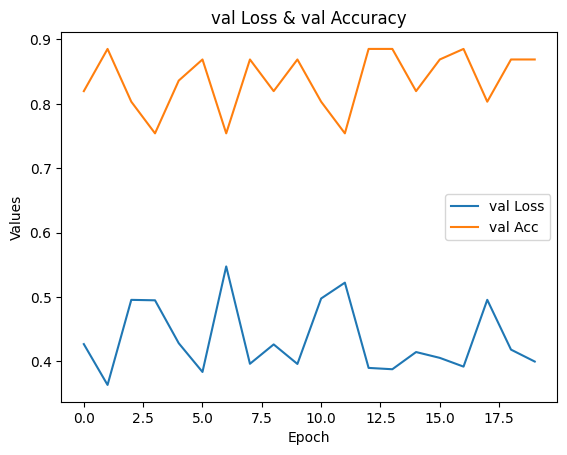

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

=> Discussion: The val loss is decreasingly and val accuracy is increasingly at the end of training. But the lines are so fluctuation, it may the epoch and batch size are large, so the data learn fast and lead to fluctuation.

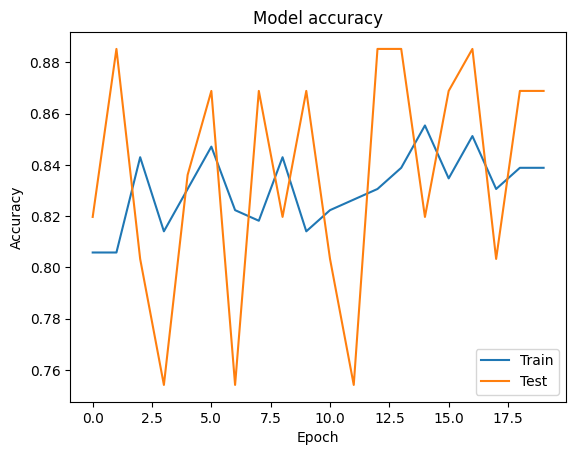

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

=> Discussion: After training and learning, train data and testing data are improved. However, it have a lot of fluctuation. It is likely that the learning rate is too high and the model is instable.

In [ ]:

def create_model_with_dropout(input_shape, output_shape):
  input = Input(shape = input_shape)
  x = Dense(units = 32, activation = "relu")(input)
  x = Dropout(rate = 0.1, seed = 1)(x)
  x = Dense(units = 64, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 2)(x)
  x = Dense(units = 32, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 3)(x)
  output = Dense(units = 1, activation = "sigmoid")(x)
  return Model(input, output)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
callback = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', mode = 'max',
              save_best_only = True, verbose  = 1
)

In [ ]:
model = create_model(input_shape, output_shape)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 10,
                    validation_data = (X_test, y_test)
)

Epoch 1/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3525 - accuracy: 0.8595 - val_loss: 0.6240 - val_accuracy: 0.7049
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4180 - accuracy: 0.8182 - val_loss: 0.6420 - val_accuracy: 0.7213
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3539 - accuracy: 0.8182 - val_loss: 0.4759 - val_accuracy: 0.7869
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3436 - accuracy: 0.8554 - val_loss: 0.4122 - val_accuracy: 0.8689
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4147 - accuracy: 0.7975 - val_loss: 0.7035 - val_accuracy: 0.7377
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7975 - val_loss: 0.4019 - val_accuracy: 0.8689
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8388 - val_loss: 0.3876 - val_accuracy: 0.8525
Epoch 8/20
25/25 [==

In [ ]:
from keras.models import load_model

In [ ]:
bestmodel = load_model("best_model.h5")

In [ ]:
y_pred = bestmodel.predict(X_val)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred[:10]

array([[0.09407397],
       [0.70516056],
       [0.7531153 ],
       [0.1174618 ],
       [0.6982521 ],
       [0.7730192 ],
       [0.6543162 ],
       [0.01137403],
       [0.08858248],
       [0.65269   ]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [ ]:
y_pred[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

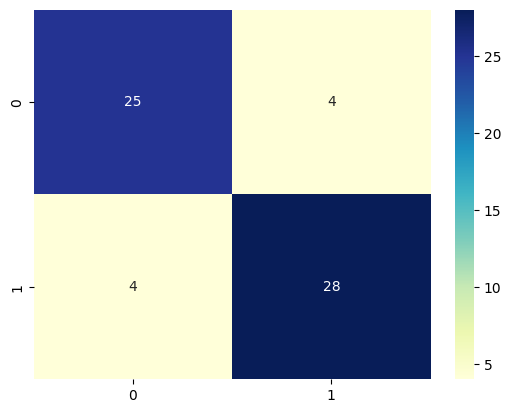

In [ ]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

input_data = (63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1)

# changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as we are predicting for one instance only
data_reshaped = data_changed.reshape(1,-1)

#standarising the input data
std_data = scaler.transform(data_reshaped)
print(std_data)

#predicting output
prediction = model.predict(std_data)
if prediction == 1:
  print('The person is Heart Attack')
else:
  print('The person is not Heart ttack')

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]]
1/1 [==============================] - 0s 21ms/step
The person is not Heart ttack
